In [28]:
import numpy
class LogisticRegression():
    def __init__(self, learning_rate=0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.insert(X,0,1,axis=1)
        num_samples, num_features = X.shape
        weights = np.ones(num_features)

        for _ in range(self.epochs):
            y_hat = self._sigmoid(np.dot(X, weights))
            weights = weights + self.learning_rate*(np.dot(y-y_hat,X)/num_samples)

        self.bias, self.weights = weights[0], weights[1:]


In [29]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

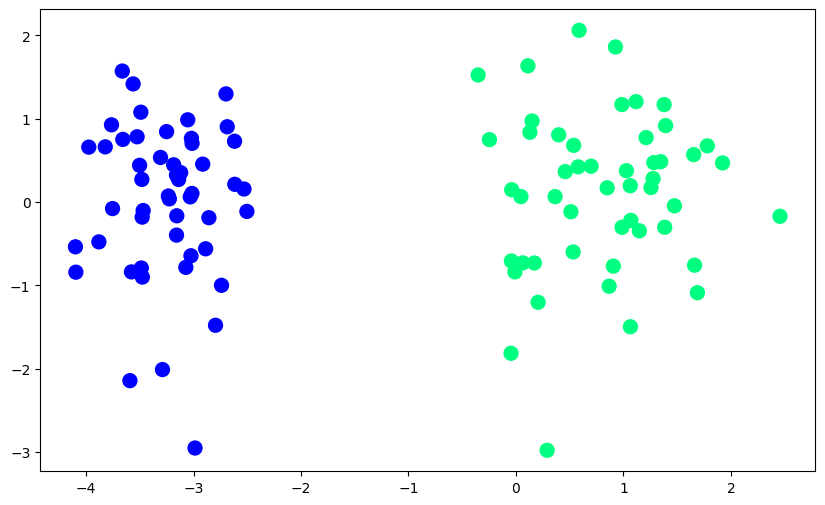

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [31]:
lr = LogisticRegression()
lr.fit(X,y)

In [32]:
print(lr.weights)
print(lr.bias)

[4.21457057 0.16023185]
4.929952752929981


(-3.0, 2.0)

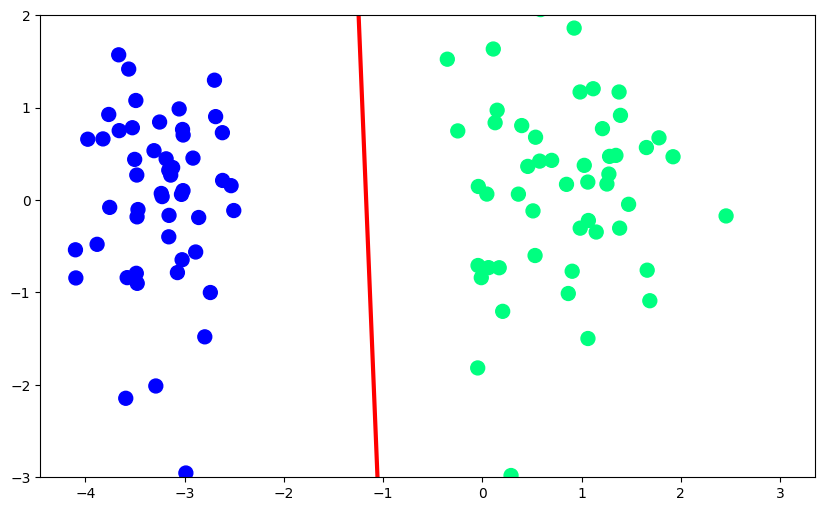

In [33]:
m = -(lr.weights[0]/lr.weights[1])
b = -(lr.bias/lr.weights[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [34]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

print(lor.coef_)
print(lor.intercept_)

[[4.78623471 0.20736949]]
[5.75531007]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [35]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m1*x_input + b1

(-3.0, 2.0)

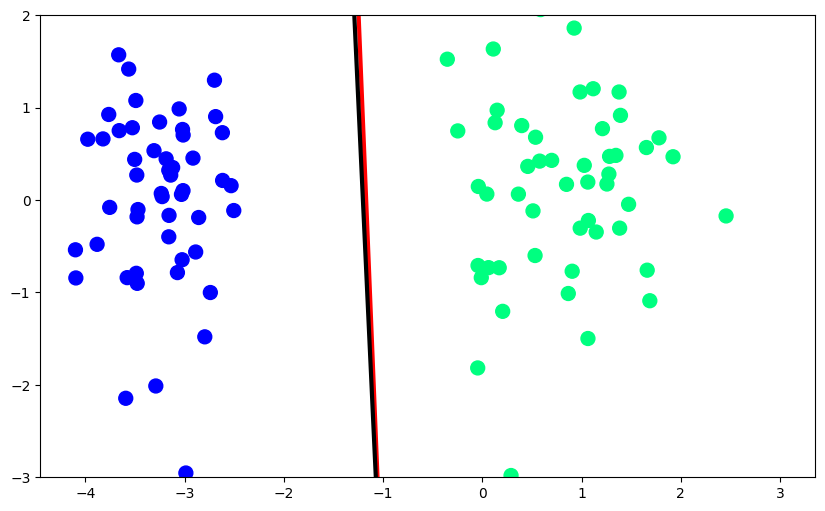

In [36]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3) # for our own implemented class
plt.plot(x_input2,y_input2,color='black',linewidth=3) # For inbuild class of sklearn
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)